In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fruits.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [3]:
from sklearn.model_selection import train_test_split
x = df[["Weight","Size"]]
y = df["Class"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size = 0.25,shuffle =True,random_state = 1)

# Ginni criteriaon

In [4]:
from  sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() #criterion hyperparameter is used  to define it is ginni or Entrophy
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [5]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Test Accuracy:", dt.score(xtest,ytest))

Training Accuracy: 1.0
Test Accuracy: 0.8


[Text(0.5, 0.75, 'x[0] <= 69.5\ngini = 0.498\nsamples = 30\nvalue = [16, 14]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]')]

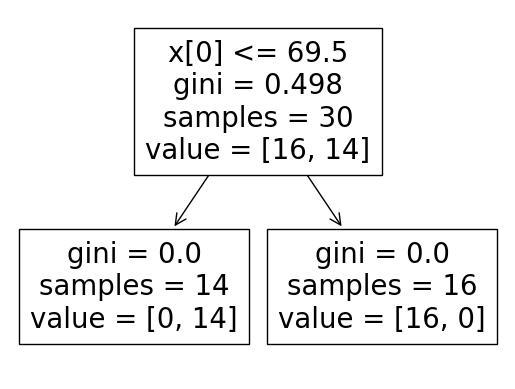

In [6]:
from sklearn.tree import plot_tree
plot_tree(dt)   

[Text(0.5, 0.75, 'Weight <= 69.5\ngini = 0.498\nsamples = 30\nvalue = [16, 14]\nclass = apple'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = orange'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = apple')]

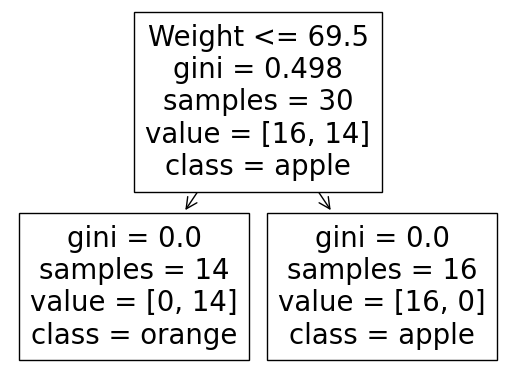

In [7]:
plot_tree(dt,feature_names=['Weight','Size'],class_names=["apple","orange"])

In [8]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Weight','size']))

|--- Weight <= 69.50
|   |--- class: orange
|--- Weight >  69.50
|   |--- class: apple



# Entropy criteria

In [9]:
from  sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy") #criterion hyperparameter is used  to define it is ginni or Entrophy
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [10]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Test Accuracy:", dt.score(xtest,ytest))

Training Accuracy: 1.0
Test Accuracy: 0.8


[Text(0.5, 0.75, 'Weight <= 69.5\nentropy = 0.997\nsamples = 30\nvalue = [16, 14]\nclass = apple'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = orange'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = apple')]

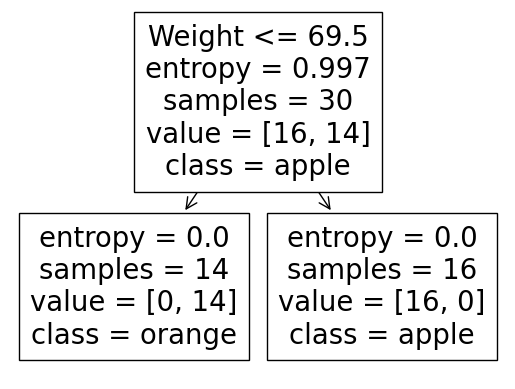

In [11]:
plot_tree(dt,feature_names=['Weight','Size'],class_names=["apple","orange"])

In [12]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Weight','size']))

|--- Weight <= 69.50
|   |--- class: orange
|--- Weight >  69.50
|   |--- class: apple



# Grid methord

In [13]:
from sklearn.model_selection import GridSearchCV
model  = GridSearchCV(DecisionTreeClassifier(),param_grid={"criterion":["entropy","ginni"]},
                      scoring='accuracy',cv =5)
model.fit(xtrain,ytrain)


C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\base.py", line 581

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'ginni']},
             scoring='accuracy')

In [14]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [15]:
model.score(xtrain,ytrain)

1.0

In [16]:
print(export_text(model.best_estimator_,feature_names=['Weight','size']))

|--- size <= 4.97
|   |--- class: orange
|--- size >  4.97
|   |--- class: apple



## Multiclass classifier

In [17]:
df1 = pd.read_csv("BMI.csv")
df1.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [18]:
from sklearn.preprocessing import LabelEncoder
lt = LabelEncoder()
df1['Gender'] = lt.fit_transform(df1['Gender'])

In [19]:
from sklearn.model_selection import train_test_split
x = df1[['Gender','Height','Weight']]
y =  df1['Index']
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size = 0.25,shuffle =True,random_state = 1)

In [20]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
gv = {'criterion':['ginni','entropy'], 'max_depth':[2,3,4,5,6],'max_features':[1,2,3]}
model = GridSearchCV(DecisionTreeClassifier(),param_grid=gv,scoring='accuracy',cv=10,verbose=True)
model.fit(xtrain,ytrain)


C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy', verbose=True)

In [22]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=3)

In [23]:
print(export_text(model.best_estimator_,feature_names=['Gender','Height','Weight']))

|--- Weight <= 83.50
|   |--- Height <= 167.50
|   |   |--- Weight <= 63.50
|   |   |   |--- Height <= 152.00
|   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Weight >  57.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Height >  152.00
|   |   |   |   |--- Height <= 162.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Height >  162.50
|   |   |   |   |   |--- Height <= 163.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Height >  163.50
|   |   |   |   |   |   |--- class: 2
|   |   |--- Weight >  63.50
|   |   |   |--- Height <= 148.50
|   |   |   |   |--- Height <= 141.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Height >  141.50
|   |   |   |   |   |--- cl

[Text(0.5089285714285714, 0.9285714285714286, 'Weight <= 83.5\nentropy = 2.17\nsamples = 375\nvalue = [9, 19, 52, 51, 98, 146]'), Text(0.2910714285714286, 0.7857142857142857, 'Height <= 167.5\nentropy = 2.194\nsamples = 113\nvalue = [9, 19, 47, 20, 16, 2]'), Text(0.14642857142857144, 0.6428571428571429, 'Weight <= 63.5\nentropy = 1.853\nsamples = 54\nvalue = [1, 0, 19, 16, 16, 2]'), Text(0.07142857142857142, 0.5, 'Height <= 152.0\nentropy = 0.998\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'), Text(0.04285714285714286, 0.35714285714285715, 'Weight <= 57.5\nentropy = 0.863\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]'), Text(0.02857142857142857, 0.21428571428571427, 'Gender <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'), Text(0.014285714285714285, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'), Text(0.04285714285714286, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'), Text(0.05714285714285714, 0.214285714285714

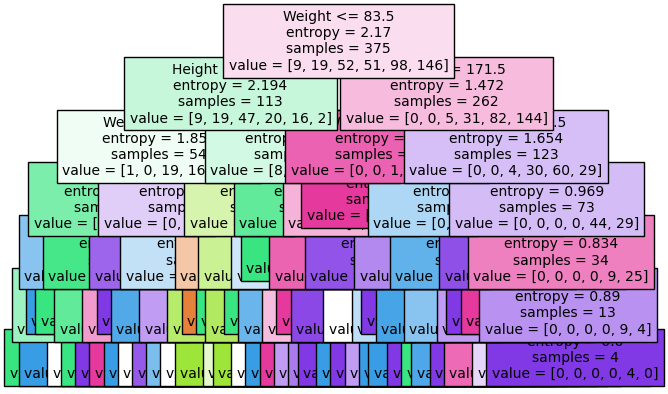

In [24]:
print(plot_tree(model.best_estimator_,feature_names=['Gender','Height','Weight'],filled=True,fontsize=10))

# Learning Ensembles

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])

In [26]:
df1.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


# Random Forest classifier

In [27]:
from sklearn.model_selection import train_test_split
x = df1[['Gender','Height','Weight']]
y =  df1['Index']
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size = 0.25,shuffle =True,random_state = 1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)


RandomForestClassifier()

In [29]:
rfc.score(xtrain,ytrain)

1.0

In [30]:
len(xtrain)

375

In [31]:
len(rfc.estimators_)

100

In [32]:
x = rfc.predict(xtest)
x

array([5, 3, 4, 2, 5, 4, 5, 0, 4, 5, 5, 4, 5, 4, 4, 4, 2, 5, 5, 3, 4, 4,
       5, 0, 5, 4, 5, 4, 4, 3, 3, 5, 2, 5, 4, 5, 2, 3, 4, 5, 3, 2, 5, 4,
       5, 3, 5, 5, 1, 5, 4, 0, 3, 2, 5, 1, 2, 4, 5, 2, 2, 0, 5, 5, 1, 5,
       2, 5, 4, 3, 4, 4, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 3, 4, 2, 5, 4, 5,
       5, 5, 2, 5, 2, 5, 4, 4, 4, 3, 5, 4, 2, 1, 5, 3, 5, 4, 3, 5, 4, 5,
       4, 2, 4, 4, 4, 3, 5, 5, 4, 5, 4, 5, 4, 4, 5], dtype=int64)

In [33]:
xt = xtest.iloc[1:2]
xt

,Gender,Height,Weight
340,0,155,71


In [34]:
rfc.predict(xt)

array([3], dtype=int64)

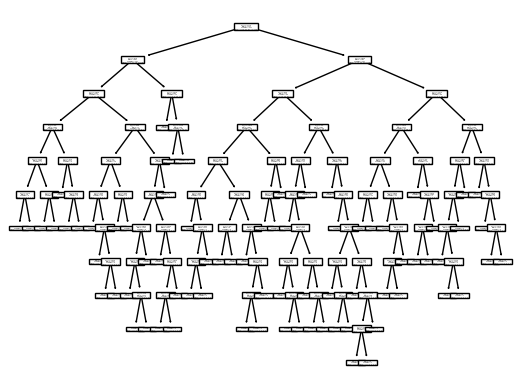

In [35]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt
plot_tree(rfc.estimators_[6])
plt.show()


In [36]:
from sklearn. ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bg = BaggingClassifier(base_estimator=LogisticRegression())  #to change  the base classifier we use base_estimator
bg.fit(xtrain,ytrain)

C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

BaggingClassifier(base_estimator=LogisticRegression())

In [37]:
bg.score(xtrain,ytrain)

0.7386666666666667

# Boosting method

In [38]:
from sklearn.ensemble import AdaBoostClassifier
bst = AdaBoostClassifier(n_estimators= 100) #no of samples
bst.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100)

In [39]:
bst.score(xtrain,ytrain)

0.36

# stacking Classifier

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
sc = StackingClassifier(estimators=[('svc',SVC()),('lr',LogisticRegression())])
sc.fit(xtrain,ytrain)

C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('svc', SVC()), ('lr', LogisticRegression())])

In [42]:
sc.score(xtrain,ytrain)

0.9146666666666666